# 📊 Project 2 — Bank Marketing Classification
*Portuguese Banking Institution*

---

## Phase 1 — Business Understanding


### Business Objective
The bank runs large-scale telemarketing campaigns to promote term deposits. These campaigns are expensive, requiring significant staff time and customer contact.  

The goal is to **improve the efficiency of marketing campaigns** by identifying which clients are most likely to subscribe to a term deposit.  

If successful:
- Fewer wasted calls and resources
- Higher conversion rates
- Improved customer satisfaction by reducing unwanted contact


### Data Science Objective
Translate the business need into a technical task:  

- Build a **binary classification model** that predicts whether a client will subscribe (`y = yes`) or not (`y = no`).  
- Compare at least two baseline models (Logistic Regression and Random Forest).  
- Optimize performance through hyperparameter tuning and imbalance handling.  
- Provide insights into which features (e.g., age, job, previous campaign outcome, economic indicators) influence the outcome most.  


### Success Criteria / KPIs
The project will be considered successful if the model:  
- Achieves meaningful lift over a naive baseline (predicting "no" for all clients).  
- Shows improved **Precision, Recall, F1-score, and ROC-AUC**, not just Accuracy.  
- Provides interpretable insights that stakeholders can act on.  

*Example*: A target Precision of >0.30 and Recall >0.40 for the positive class ("yes"), with ROC-AUC above 0.70.


### Stakeholders & Constraints
**Stakeholders:**
- Bank Marketing Department (campaign planners, analysts)
- Call center staff (implementing the campaigns)
- Bank executives (strategic planning and ROI evaluation)

**Constraints:**
- Time: project due in 2 weeks (student scope)
- Budget: limited compute, must use free/open-source tools (scikit-learn, imbalanced-learn)
- Data: fixed dataset from UCI, no additional data collection
- Risk tolerance: avoid false positives that waste resources, but also avoid missing too many likely customers


### Project Plan
- **Phase 1**: Business Understanding (define goals, success criteria) ✅  
- **Phase 2**: Data Understanding (EDA, data profiling, class imbalance analysis)  
- **Phase 3**: Data Preparation (encoding, scaling, missing values, leakage prevention)  
- **Phase 4**: Modeling (Logistic Regression, Random Forest, tuning, resampling)  
- **Phase 5**: Evaluation (compare models, check KPIs, review process)  
- **Phase 6**: Deployment (recommend workflow for stakeholders, monitoring plan)  

*Tools*: Visual Studio Code, Python, pandas, seaborn, matplotlib, scikit-learn, imbalanced-learn  
*Risks*: Data imbalance, overfitting, data leakage (notably from `duration` feature)


### Core Imports (used throughout the project)


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set default plotting style
sns.set(style="whitegrid")


## Phase 2 — Data Understanding

### Dataset Selected
We will use **bank-additional-full.csv**, which contains **~41,188 rows** and **21 columns** (20 input features + 1 output label) (`y`).

This dataset is the enriched version of the UCI Bank Marketing dataset, including additional macroeconomic indicators (e.g., employment variation rate, consumer confidence index).  

**Citation**:  
[Moro et al., 2014] S. Moro, P. Cortez, and P. Rita. *A Data-Driven Approach to Predict the Success of Bank Telemarketing.* Decision Support Systems, 2014. DOI: [10.1016/j.dss.2014.03.001](http://dx.doi.org/10.1016/j.dss.2014.03.001)

---

### Dataset Dictionary — `bank-additional-full.csv`

#### 📂 Bank Client Data
- **age** (numeric): Client’s age  
- **job** (categorical): Type of job  
  *Values*: admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown  
- **marital** (categorical): Marital status  
  *Values*: divorced, married, single, unknown  
- **education** (categorical): Education level  
  *Values*: basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown  
- **default** (categorical): Has credit in default? (yes, no, unknown)  
- **housing** (categorical): Has housing loan? (yes, no, unknown)  
- **loan** (categorical): Has personal loan? (yes, no, unknown)  

---

#### ☎️ Last Contact Info
- **contact** (categorical): Contact type (cellular, telephone)  
- **month** (categorical): Last contact month (jan … dec)  
- **day_of_week** (categorical): Last contact day (mon … fri)  
- **duration** (numeric): Last contact duration (seconds)  
  ⚠️ *Note*: Highly predictive, but not realistic for modeling since it’s only known after the call. Usually excluded from training.  

---

#### 📊 Campaign Data
- **campaign** (numeric): Number of contacts during this campaign  
- **pdays** (numeric): Days since last contact from a previous campaign (999 = not previously contacted)  
- **previous** (numeric): Number of contacts before this campaign  
- **poutcome** (categorical): Outcome of previous campaign (failure, nonexistent, success)  

---

#### 🌍 Social & Economic Context
- **emp.var.rate** (numeric): Employment variation rate (quarterly)  
- **cons.price.idx** (numeric): Consumer price index (monthly)  
- **cons.conf.idx** (numeric): Consumer confidence index (monthly)  
- **euribor3m** (numeric): Euribor 3-month rate (daily)  
- **nr.employed** (numeric): Number of employees (quarterly)  

---

#### 🎯 Target Variable
- **y** (binary categorical): Has the client subscribed to a term deposit?  
  *Values*: yes, no


In [ ]:
# Load dataset (update path if needed)
df = pd.read_csv("./data/bank-additional-full.csv", sep=";")

# Shape of the dataset (rows, columns)
df.shape

(41188, 21)

In [20]:
# Quick look, print first 5 rows
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Basic dataset info
df.info()

# Summary statistics
df.describe(include="all").transpose().head(20)


### Column Profiling (Summary)

| Column          | Type        | Units      | Min   | Max   | # Unique | % Missing / Unknown | Notes |
|-----------------|------------|-----------|-------|-------|----------|---------------------|-------|
| age             | Numeric    | years     |       |       |          |                     |       |
| job             | Categorical| n/a       |       |       |          |                     |       |
| marital         | Categorical| n/a       |       |       |          |                     |       |
| education       | Categorical| n/a       |       |       |          |                     |       |
| default         | Categorical| yes/no    |       |       |          |                     |       |
| …               | …          | …         | …     | …     | …        | …                   | …     |
| y (target)      | Binary     | yes/no    |       |       |          |                     |       |


In [23]:
# Count 'unknown' entries (used in this dataset instead of NaN)
df.isin(["unknown"]).sum().sort_values(ascending=False).head(10)


default        8597
education      1731
housing         990
loan            990
job             330
marital          80
age               0
contact           0
month             0
day_of_week       0
dtype: int64

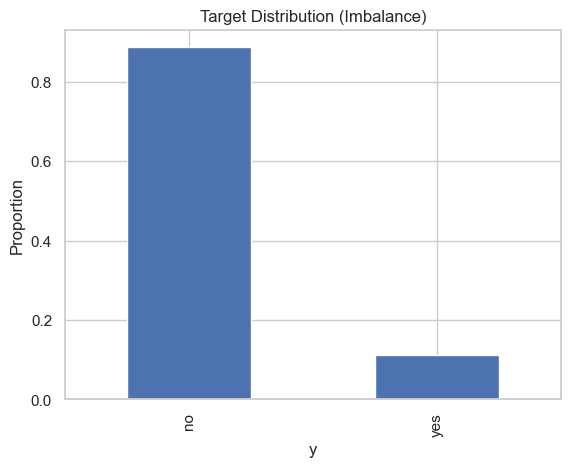

In [24]:
# Target distribution (yes/no)
df['y'].value_counts(normalize=True).plot(kind='bar', title='Target Distribution (Imbalance)')
plt.ylabel("Proportion")
plt.show()


### Initial Observations
- Dataset has ~41k rows and 21 columns (20 features + target).
- No true NaNs, but "unknown" acts as missing for some categorical features.
- Strong class imbalance: majority of clients did **not** subscribe ("no").


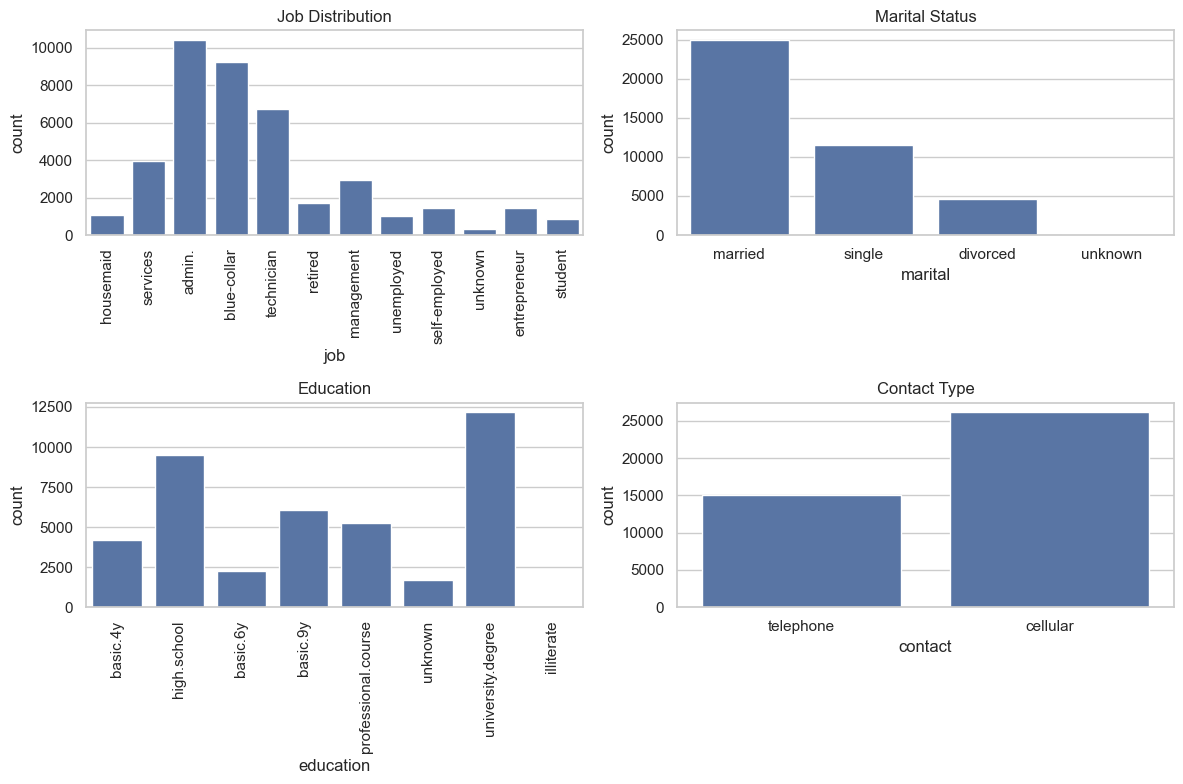

In [25]:
# Countplots for selected categorical features
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.countplot(data=df, x="job", ax=axes[0,0])
axes[0,0].set_title("Job Distribution")
axes[0,0].tick_params(axis='x', rotation=90)

sns.countplot(data=df, x="marital", ax=axes[0,1])
axes[0,1].set_title("Marital Status")

sns.countplot(data=df, x="education", ax=axes[1,0])
axes[1,0].set_title("Education")
axes[1,0].tick_params(axis='x', rotation=90)

sns.countplot(data=df, x="contact", ax=axes[1,1])
axes[1,1].set_title("Contact Type")

plt.tight_layout()
plt.show()


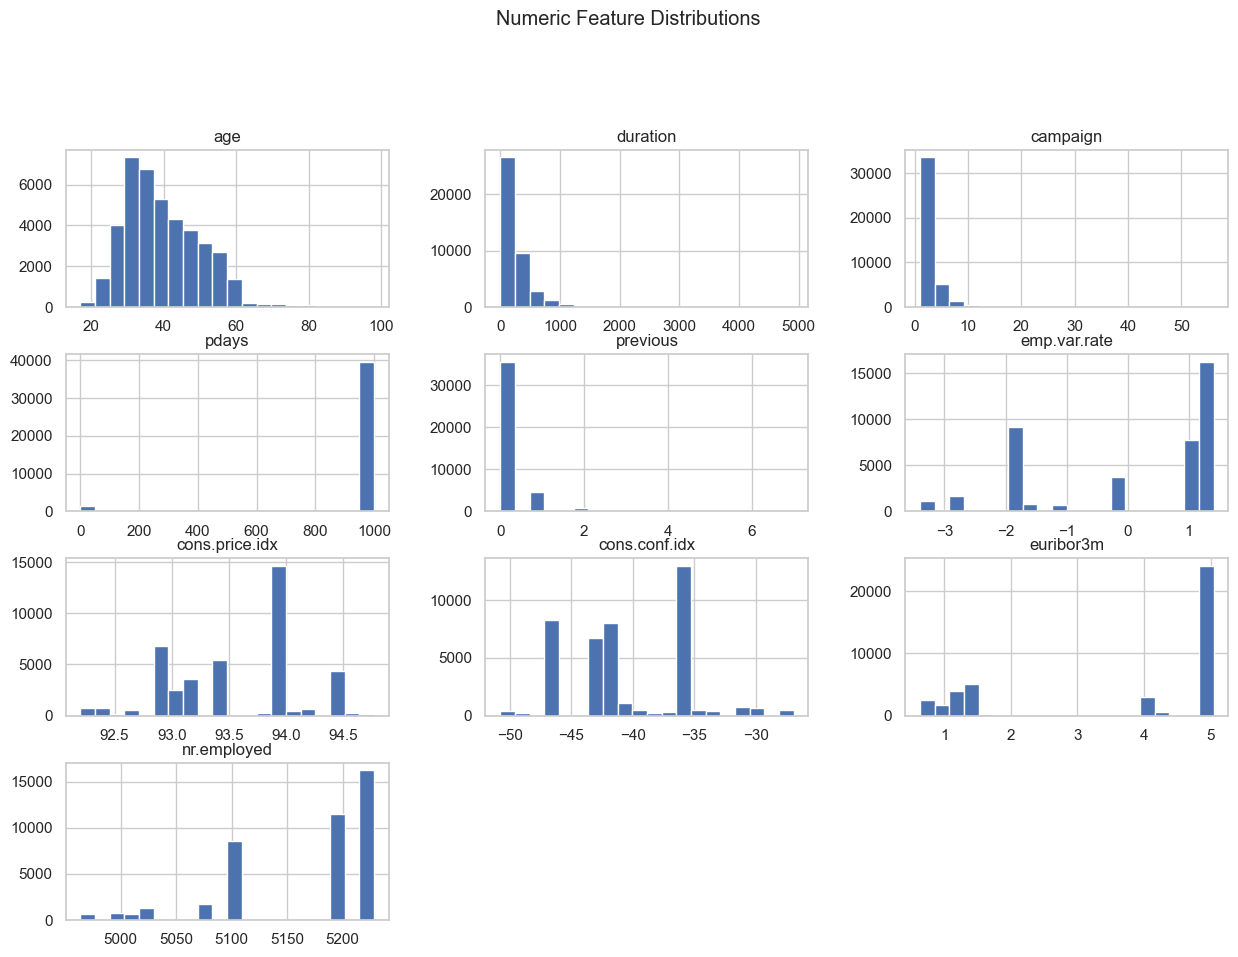

In [26]:
# Histograms for numeric features
num_features = df.select_dtypes(exclude="object").columns

df[num_features].hist(bins=20, figsize=(15, 10))
plt.suptitle("Numeric Feature Distributions", y=1.02)
plt.show()


### Data Quality Checks
- **Duplicates**: check if duplicate rows exist.
- **Outliers**: inspect numeric variables (e.g., `campaign`, `pdays`).
- **Consistency**: categorical values are clean, but many "unknown" entries.

Next, we will decide which features to keep/drop and how to handle missing/unknowns.


In [27]:
# Check for duplicate rows
df.duplicated().sum()

# Quick look at unusual values
df['campaign'].describe(), df['pdays'].describe()


(count    41188.000000
 mean         2.567593
 std          2.770014
 min          1.000000
 25%          1.000000
 50%          2.000000
 75%          3.000000
 max         56.000000
 Name: campaign, dtype: float64,
 count    41188.000000
 mean       962.475454
 std        186.910907
 min          0.000000
 25%        999.000000
 50%        999.000000
 75%        999.000000
 max        999.000000
 Name: pdays, dtype: float64)

In [22]:

# ========================================================================================= #


In [ ]:
# Target distribution
df['y'].value_counts(normalize=True).plot(kind='bar', title='Target Distribution (Imbalance)')
plt.show()


### Notes:
- Document dataset size, number of features.
- Record any missing values (in this dataset, 'unknown' often encodes missingness).
- Note class imbalance in `y`.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate features and target
X = df.drop("y", axis=1)
y = df["y"].map({"yes":1, "no":0})  # convert to binary

# Identify categorical vs numeric
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

cat_features, num_features


In [ ]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
    ]
)


### Data Cleaning Decisions
- Treat "unknown" as missing and encode as its own category.
- Exclude **`duration`** from modeling (data leakage) — but keep for EDA/benchmarking.
- Scale numeric features, one-hot encode categorical features.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Logistic Regression with class_weight to handle imbalance
log_reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

# Random Forest baseline
rf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(random_state=42))
])

models = {"Logistic Regression": log_reg, "Random Forest": rf}


In [ ]:
# Train & evaluate models
for name, model in models.items():
    print(f"\n{name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_proba))
    RocCurveDisplay.from_predictions(y_test, y_proba)
    plt.title(f"ROC Curve — {name}")
    plt.show()


### Observations
- Compare performance of Logistic Regression vs Random Forest.
- Discuss tradeoffs between interpretability (LogReg) and predictive power (RF).


In [ ]:
from sklearn.model_selection import GridSearchCV

# Example: tune Random Forest
param_grid = {
    "model__n_estimators": [100, 300],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5]
}

grid_search = GridSearchCV(
    rf, param_grid, cv=3, scoring="f1", n_jobs=-1
)
grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


### Next Steps
- Test resampling strategies (SMOTE, undersampling).
- Use tuned hyperparameters for final model.
- Re-run metrics and compare.


### Final Summary
- **Model Chosen**: (e.g., Random Forest after tuning).
- **Preprocessing**: One-hot encoding, scaling, excluded `duration`.
- **Class Imbalance**: Addressed with class weights / resampling.
- **Performance**: (insert metrics here).
- **Business Impact**: Bank can better target customers, improve campaign efficiency.
